# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import time
import datetime as dt
# visualization
import matplotlib.pyplot as plt
import dateutil

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv"

### Step 3. Assign it to a variable apple

In [3]:
apple = pd.read_csv(url)

### Step 4.  Check out the type of the columns

In [4]:
apple.info(), apple.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


(None,
          Date   Open   High    Low  Close    Volume  Adj Close
 0  2014-07-08  96.27  96.80  93.92  95.35  65130000      95.35
 1  2014-07-07  94.14  95.99  94.10  95.97  56305400      95.97
 2  2014-07-03  93.67  94.10  93.20  94.03  22891800      94.03
 3  2014-07-02  93.87  94.06  93.09  93.48  28420900      93.48
 4  2014-07-01  93.52  94.07  93.13  93.52  38170200      93.52)

### Step 5. Transform the Date column as a datetime type

In [5]:
apple['Date'] = pd.to_datetime(apple['Date'])
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


### Step 6.  Set the date as the index

In [6]:
apple.set_index('Date', inplace=True)

### Step 7.  Is there any duplicate dates?

In [7]:
len(apple) - apple.index.nunique()
#There is no duplicated

0

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [8]:
apple = apple.reindex(index=apple.index[::-1])

### Step 9. Get the last business day of each month

In [9]:
#apple2 = apple.resample('BM')

In [10]:
import calendar
import datetime
today=datetime.date.today()
print(today)
apple_monthly = apple.reset_index().groupby([apple.index.year,apple.index.month],as_index=False).last().set_index('Date')
apple_monthly

2020-12-23


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44
...,...,...,...,...,...,...
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83
2014-05-30,637.98,644.17,628.90,633.00,141005200,90.43


### Step 10.  What is the difference in days between the first day and the oldest

In [11]:
apple.index[-1] - apple.index[0]

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [12]:
apple.index[-1].to_period('M') - apple.index[0].to_period('M') #first option

<403 * MonthEnds>

In [13]:
(apple.index[-1] - apple.index[0]) / np.timedelta64(1, 'M') #second option

402.8337337522331

In [14]:
monthCount = len(apple.reset_index().groupby([apple.index.month, apple.index.year])) #not precise
monthCount

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [16]:
apple.info()
import seaborn as sns
import matplotlib as plt
import plotly as po

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8465 entries, 1980-12-12 to 2014-07-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8465 non-null   float64
 1   High       8465 non-null   float64
 2   Low        8465 non-null   float64
 3   Close      8465 non-null   float64
 4   Volume     8465 non-null   int64  
 5   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 462.9 KB


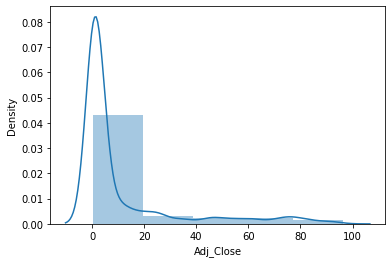

In [40]:
apple.rename(columns={"Adj Close":"Adj_Close"}, inplace=True)
a = sns.distplot(apple.Adj_Close, bins=5)

### BONUS: Create your own question and answer it.